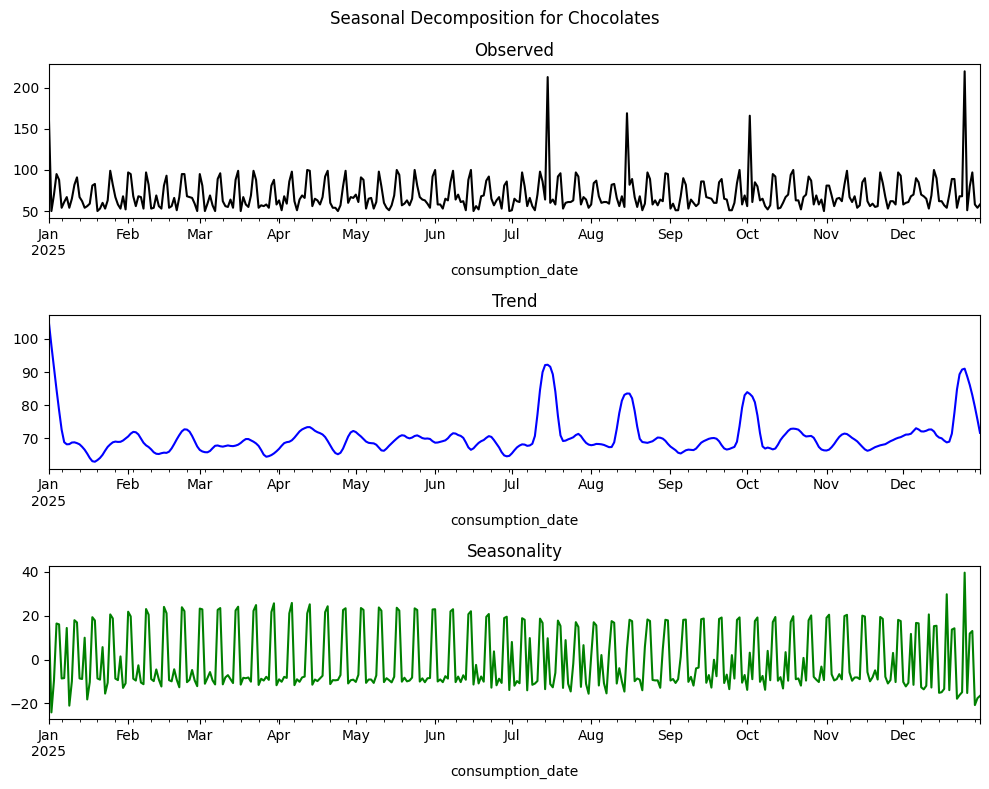

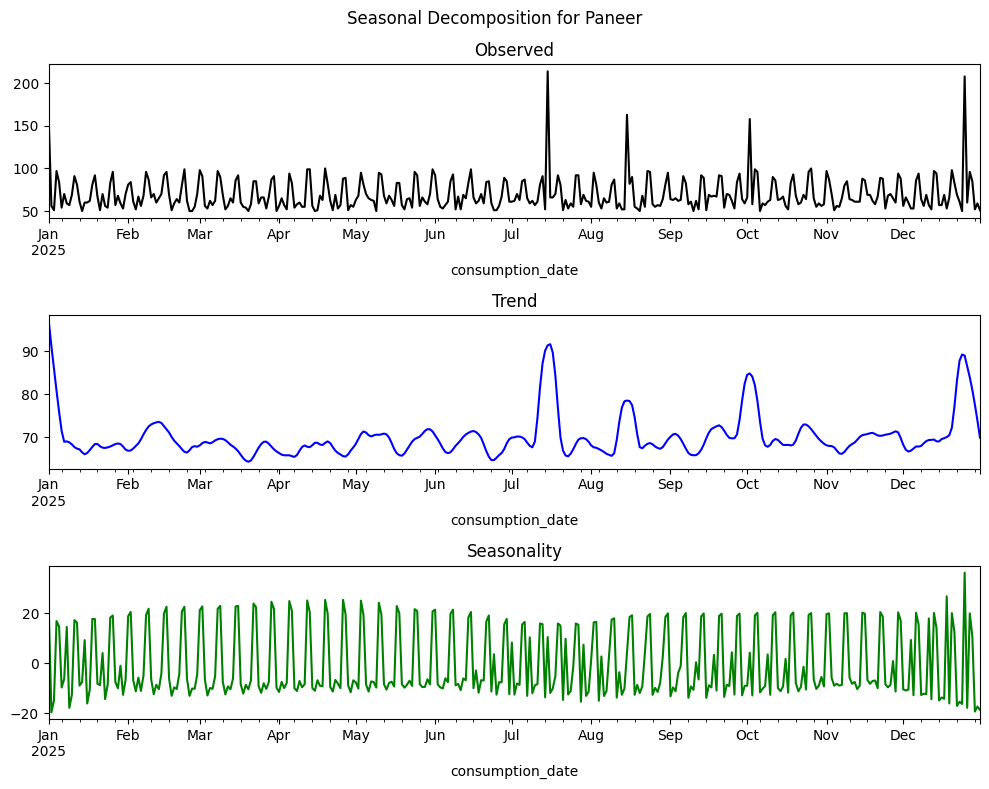

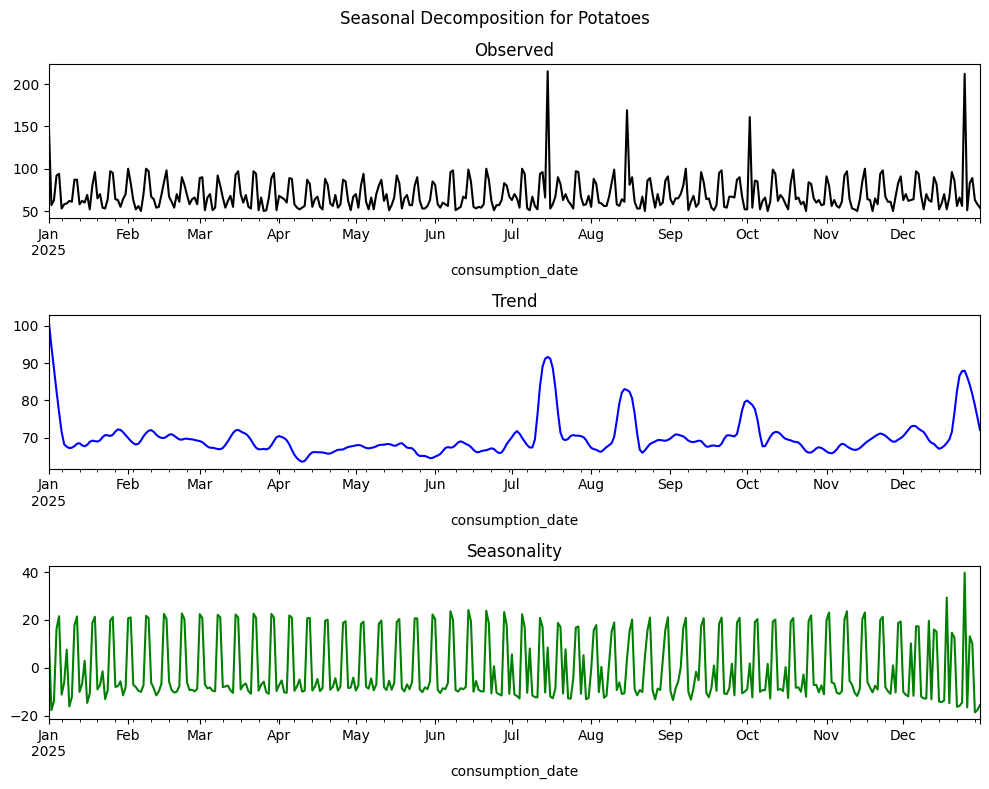

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load dataset
file_path = "consumption_data_2025.xlsx"
df = pd.read_excel(file_path)

# Convert date column to datetime format
df['consumption_date'] = pd.to_datetime(df['consumption_date'])

# Aggregate consumption per item per day
df_grouped = df.groupby(['consumption_date', 'item'])['consumed_quantity'].sum().reset_index()

# Get unique items for analysis
unique_items = df_grouped['item'].unique()

# Store decomposition results
decomposition_results = {}

# Loop through each item to perform seasonal decomposition
for item in unique_items:
    # Filter data for the current item
    item_data = df_grouped[df_grouped['item'] == item][['consumption_date', 'consumed_quantity']]
    item_data = item_data.set_index('consumption_date').asfreq('D').fillna(0)
    
    # Apply STL decomposition
    stl = STL(item_data['consumed_quantity'], seasonal=13)
    result = stl.fit()
    
    # Store results
    decomposition_results[item] = result
    
    # Plot decomposition
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))
    result.observed.plot(ax=axes[0], title='Observed', color='black')
    result.trend.plot(ax=axes[1], title='Trend', color='blue')
    result.seasonal.plot(ax=axes[2], title='Seasonality', color='green')
    plt.suptitle(f'Seasonal Decomposition for {item}')
    plt.tight_layout()
    plt.show()

# Save decomposition results
for item, result in decomposition_results.items():
    result_df = pd.DataFrame({
        'date': item_data.index,
        'observed': result.observed,
        'trend': result.trend,
        'seasonal': result.seasonal,
        'residual': result.resid
    })
    result_df.to_csv(f"stl_decomposition_{item}.csv", index=False)
